In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.externals import joblib

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/datatran_2016-2017.csv')
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(184224, 32)

In [3]:
df.head()

,br,causa_acidente,classificacao_acidente,condicao_metereologica,delegacia,dia_semana,fase_dia,feridos,feridos_graves,feridos_leves,...,tracado_via,uf,uop,uso_solo,veiculos,hora,ano,mes,dia,target
0,376.0,Fenômenos da Natureza ...,Com Vítimas Feridas,Chuva,DEL7/7,domingo,Plena Noite,1,1,0,...,Reta,PR,UOP05/PR,Não,1,0,2017,1,1,1
1,101.0,Falta de Atenção à Condução ...,Sem Vítimas,Chuva,DEL8/1,domingo,Plena Noite,0,0,0,...,Curva,SC,UOP02/SC,Não,1,0,2017,1,1,0
2,153.0,Animais na Pista ...,Com Vítimas Feridas,Garoa/Chuvisco,DEL7/7,domingo,Plena Noite,2,0,2,...,Reta,PR,UOP07/PR,Não,1,0,2017,1,1,1
3,153.0,Avarias e/ou desgaste excessivo no pneu ...,Com Vítimas Feridas,Céu Claro,DEL1/2,domingo,Plena Noite,1,1,0,...,Reta,GO,UOP01/GO,Sim,1,0,2017,1,1,1
4,280.0,Ingestão de Álcool ...,Com Vítimas Feridas,Chuva,DEL8/6,domingo,Plena Noite,1,0,1,...,Não Informado,SC,UOP03/SC,Não,1,0,2017,1,1,1


In [4]:
df.target.value_counts()

1    108520
0     65167
2     10537
Name: target, dtype: int64

In [5]:
class0 = df[df.target==0].sample(10537)
class1 = df[df.target==1].sample(10537)
class2 = df[df.target==2]

df2 = shuffle(pd.concat([class0, class1, class2]))

In [6]:
dd = df2[['dia_semana', 'uf', 'br', 'km', 'causa_acidente', 'tipo_acidente', 
        'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'target']]
dd.dropna(inplace=True)

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(verbose=1)

parameters = {
    'n_estimators': [10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'auto', 'log2', None],
    'class_weight': ['balanced', None],
}

scorer = make_scorer(score_func=accuracy_score)
grid_obj = GridSearchCV(model, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

model = grid_fit.best_estimator_

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]

In [10]:
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [11]:
joblib.dump(model, '../model/modelo_v0_random_forest.pkl') 

['../model/modelo_v0_random_forest.pkl']

In [12]:
accuracy_score(y_test, y_pred)

0.5497705333122329

Confusion matrix, without normalization
[[1443  455  223]
 [ 871  847  443]
 [ 440  413 1184]]


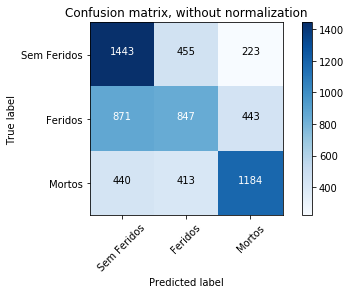

In [13]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [14]:
precision0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[1,0] + cnf_matrix[1,2])
recall0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[0,1] + cnf_matrix[0,2])

print('Precision classe de sem vítimas: ', precision0)
print('Recall classe de sem vítimas: ', recall0)
print('F1 classe de sem vítimas: ', 1 * ((precision0 * recall0) / (precision0 + recall0)))

precision1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1] + cnf_matrix[2,1])
recall1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0] + cnf_matrix[1,2])

print('Precision classe de feridos: ', precision1)
print('Recall classe de feridos: ', recall1)
print('F1 classe de feridos: ', 1 * ((precision1 * recall1) / (precision1 + recall1)))

precision2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[0,2] + cnf_matrix[1,2])
recall2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[2,0] + cnf_matrix[2,1])

print('Precision classe de mortos: ', precision2)
print('Recall classe de mortos: ', recall2)
print('F1 classe de mortos: ', 1 * ((precision2 * recall2) / (precision2 + recall2)))

Precision classe de sem vítimas:  0.5233949945593036
Recall classe de sem vítimas:  0.6803394625176803
F1 classe de sem vítimas:  0.2958179581795818
Precision classe de feridos:  0.49387755102040815
Recall classe de feridos:  0.3919481721425266
F1 classe de feridos:  0.21852425180598553
Precision classe de mortos:  0.64
Recall classe de mortos:  0.5812469317623957
F1 classe de mortos:  0.30460509390275275
